#### 1. Import Necessary Packages and Data

In [1]:
# GENERAL
import pandas as pd                                    #Used to read data
import numpy as np                                     #Used to compute Root Mean Square Error
import matplotlib.pyplot as plt                        #Used to visualize data
import seaborn as sns                                  #Used to visualize data
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
from sklearn.metrics import ConfusionMatrixDisplay     #Used to visualize data

# MODEL SPECIFIC
from sklearn.naive_bayes import BernoulliNB            #Used to fit and predict a Naive Bayes Model 

# DATA
inputData = pd.read_excel(r'/Users/emilyknight/Documents/BMEN415 Final Project/CTG.xlsx').sample(frac = 1) #Import data

inputData.head() #Print complete dataset to console

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,NSP
1076,137,1,0,0,20,2.0,0,0.0,5,0,0,1
1256,118,1,0,7,25,1.3,0,10.9,1,0,0,1
512,154,1,1,1,56,0.6,1,9.2,0,0,0,1
1425,144,3,0,1,40,0.9,5,8.3,1,0,0,1
1794,121,0,1,3,68,2.1,0,0.0,9,1,0,3


#### 2. Select and Split Input and Output Vectors

In [2]:
# Select Input Vector, X, and Output Vector, y
X = inputData.drop(columns=['NSP']) #Input vector is all data but the Fetal State Class Code
y = inputData['NSP'] #Output data is the Fetal State Class Code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #Split vectors, 20% will be used for testing 

#### 3. Instantiate and Fit Models

In [3]:
naive_bayes = BernoulliNB() #Bernoulli Naive Bayes Model

naive_bayes.fit(X_train, y_train) #Fit the Model given the NB Function

BernoulliNB()

#### 4. Score The Determination of the Prediction

In [4]:
naive_bayes.score(X_test,y_test)

0.8145539906103286

#### 5. Test and Quantify Model Performance

In [5]:
naive_bayes_predictions = naive_bayes.predict(X_test) #Create predictions based on the NB model with unseen test data 

#Compare the predictions to the known test values
print(metrics.confusion_matrix(y_test, naive_bayes_predictions))

[[283  53   7]
 [  7  48   3]
 [  2   7  16]]


#### 6. Visualize Data

Confusion matrix, without normalization
[[283  53   7]
 [  7  48   3]
 [  2   7  16]]
Normalized confusion matrix
[[0.83 0.15 0.02]
 [0.12 0.83 0.05]
 [0.08 0.28 0.64]]


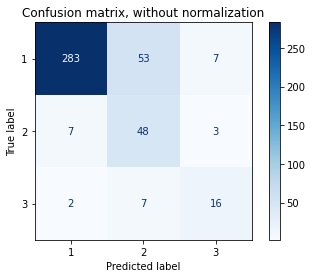

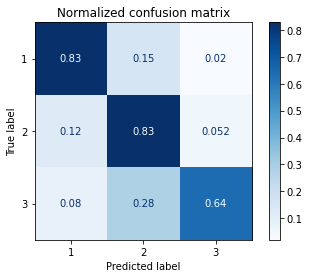

In [6]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(naive_bayes,
                                                 X_test,
                                                 y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()